In [1]:
library(topicmodels)
library(lda)
library(slam)
library(stm)
library(ggplot2)
library(dplyr)
library(tidytext)
library(furrr) # try to make it faster
plan(multicore)
library(tm) # Framework for text mining
library(tidyverse) # Data preparation and pipes %>%
library(ggplot2) # For plotting word frequencies
library(wordcloud) # Wordclouds!
library(Rtsne)
library(rsvd)
library(geometry)
library(NLP)
library(ldatuning) 

stm v1.3.7 successfully loaded. See ?stm for help. 
 Papers, resources, and other materials at structuraltopicmodel.com


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: future

Loading required package: NLP


Attaching package: 'NLP'


The following object is masked from 'package:ggplot2':

    annotate


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ NLP::annotate() masks ggplot2::annotate()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to 

In [2]:
# Clear up data in global environment
rm(list=ls())

# Load data from csv file
sentiments <- read.csv("sentiments.csv", , check.names = FALSE)

# Check for NAs
cat("\n")
sapply(sentiments, function(x) sum(is.na(x)))

cat("\n")

# Overview of original dataset
str(sentiments)
cat("\n")
sapply(sentiments, typeof)
cat("\n")

Trading app      Source     Comment   Sentiment 
          0           0           0           0


'data.frame':	5642 obs. of  4 variables:
 $ Trading app: chr  "Zerodha Kite" "Zerodha Kite" "Zerodha Kite" "Zerodha Kite" ...
 $ Source     : chr  "Play" "Play" "Play" "Play" ...
 $ Comment    : chr  "From last 2/3 months it's hell of a experience to use kite application. Charts never loads. Just never. Patheti"| __truncated__ "Prices are not real time. There's always a lag of few seconds. Whenever order gets exicuted notification comes "| __truncated__ "Everytime I close the app, the app is logout and I have login and initialize every time. - I have no power savi"| __truncated__ "The latest version is very slow. The charts never load for some stocks. The 3 dots keep on going as per the ani"| __truncated__ ...
 $ Sentiment  : chr  "negative" "negative" "negative" "negative" ...



Trading app      Source     Comment   Sentiment 
"character" "character" "character" "character"

In [3]:
set.seed(830)

# Sample 1000 rows from the original dataframe
sentiments_sample <- sentiments[sample(nrow(sentiments), 1000), ]

# Convert columns to appropriate formats
sentiments_sample$`Trading app` <- as.factor(sentiments_sample$`Trading app`)
sentiments_sample$Source <- as.factor(sentiments_sample$Source)
sentiments_sample$Comment <- as.character(sentiments_sample$Comment)
sentiments_sample$Sentiment <- as.factor(sentiments_sample$Sentiment)

# Double-check the format of each column
sapply(sentiments_sample, typeof)

Trading app      Source     Comment   Sentiment 
  "integer"   "integer" "character"   "integer"

In [4]:
# * default parameters
processed <- textProcessor(
  documents = sentiments_sample$Comment, # textual data
  metadata = sentiments_sample,          # Metadata (other columns)
  lowercase = TRUE,                      # Convert text to lowercase
  removestopwords = TRUE,                # Remove stopwords
  removenumbers = TRUE,                  # Remove numbers from the text
  removepunctuation = TRUE,              # Remove punctuation from the text
  stem = TRUE,                           # Apply stemming
  wordLengths = c(3, Inf),
  sparselevel = 1,           # Sparse level for removing rarely occurring words
  language = "en",                       # Language for stopwords
  verbose = TRUE,
  onlycharacter = TRUE,                  # Keep only alphabetic characters
  striphtml = FALSE,                     # Don't remove HTML tags
  customstopwords = NULL,                # No additional custom stopwords
  v1 = FALSE                       # Use newer version of textProcessor function
)

# Filter out terms that don’t appear in more than 10 documents
out <- prepDocuments(processed$documents, processed$vocab, processed$meta, lower.thresh = 10)

docs <- out$documents
vocab <- out$vocab
meta <- out$meta

# Check levels of the factors in your metadata
cat("\n")
cat(levels(meta$`Trading app`))
cat("\n")
cat(levels(meta$Source))
cat("\n")

Building corpus... 
Converting to Lower Case... 
Removing punctuation... 
Removing stopwords... 
Removing numbers... 
Stemming... 
Creating Output... 
Removing 2112 of 2548 terms (5073 of 21397 tokens) due to frequency 
Your corpus now has 1000 documents, 436 terms and 16324 tokens.
Angel Broking Dhani Stocks Groww HDFC Securities Motilal Oswal Nuvama Paytm Money Sharekhan Upstox Zerodha Kite
Play Reddit


Beginning Spectral Initialization 
	 Calculating the gram matrix...
	 Finding anchor words...
 	...............
	 Recovering initialization...
 	....
Initialization complete.
....................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 1 (approx. per word bound = -5.595) 
....................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 2 (approx. per word bound = -5.417, relative change = 3.178e-02) 
....................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 3 (approx. per word bound = -5.352, relative change = 1.208e-02) 
....................................................................................................
Completed E-Step (0 seconds). 
Complete

   user  system elapsed 
   0.70    0.03    1.50 


Topic 1 Top Words:
 	 Highest Prob: custom, issu, one, team, support, angel, differ 
 	 FREX: angel, custom, got, differ, support, mutual, solut 
 	 Lift: solut, angel, purchas, got, differ, mutual, way 
 	 Score: solut, custom, support, got, angel, team, mutual 
Topic 2 Top Words:
 	 Highest Prob: trade, easi, app, trader, excel, featur, recommend 
 	 FREX: excel, trader, recommend, function, easi, design, impress 
 	 Lift: impress, free, excel, function, perfect, design, recommend 
 	 Score: impress, easi, trade, excel, trader, design, tool 
Topic 3 Top Words:
 	 Highest Prob: app, old, better, version, previous, one, new 
 	 FREX: old, previous, better, far, version, hdfc, new 
 	 Lift: far, previous, old, hdfc, pay, better, given 
 	 Score: far, old, previous, version, better, hdfc, new 
Topic 4 Top Words:
 	 Highest Prob: good, app, need, sell, buy, experi, stock 
 	 FREX: good, sell, buy, navig, detail, technic, groww 
 	 Lift: navig, good, smooth, otherwis, detail, less, sell 


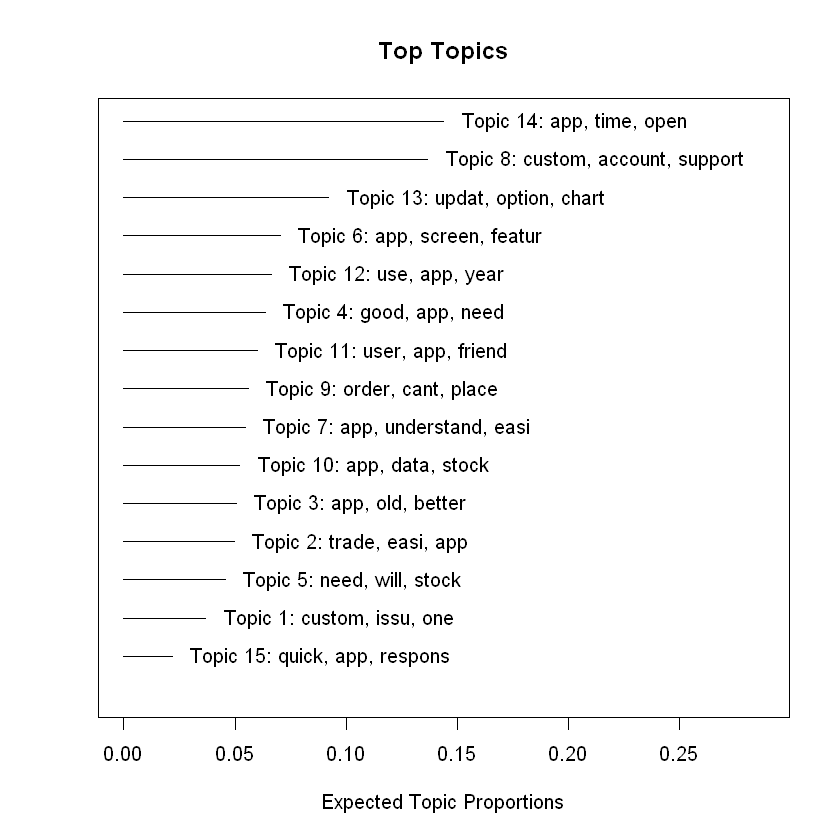

In [6]:
# Set seed for reproducibility
set.seed(831)

# Fit the STM model
system.time({
  First_STM <- stm(
    docs, vocab, 15,                          # Use 15 topics
    prevalence =~ `Trading app` + Sentiment,  # Replace 'publisher' with 'Trading App' and 'date' with 'Sentiment' or another continuous variable
    data = meta,                              # Use the metadata
    seed = 15,                                # Seed for STM model
    max.em.its = 5                            # Limit to 5 EM iterations (adjust as necessary)
  )
})

# Plot the first topic model
plot(First_STM)
cat("\n")

labels <- labelTopics(First_STM)
print(labels)
cat("\n")

   user  system elapsed 
   4.62    0.05    6.64 


Topic 1 Top Words:
 	 Highest Prob: one, fund, issu, team, support, custom, mutual 
 	 FREX: fund, angel, mutual, team, pathet, support, payment 
 	 Lift: solut, payment, fail, angel, fund, mutual, repli 
 	 Score: solut, support, mutual, fund, angel, custom, repli 
Topic 2 Top Words:
 	 Highest Prob: app, trade, trader, excel, dhan, recommend, featur 
 	 FREX: trader, excel, recommend, dhan, design, impress, tool 
 	 Lift: impress, trader, free, excel, recommend, design, tool 
 	 Score: impress, trader, dhan, excel, design, recommend, tool 
Topic 3 Top Words:
 	 Highest Prob: app, version, new, old, updat, better, previous 
 	 FREX: version, old, previous, new, far, hdfc, better 
 	 Lift: far, previous, version, old, hdfc, upgrad, sort 
 	 Score: far, version, old, new, previous, hdfc, better 
Topic 4 Top Words:
 	 Highest Prob: good, stock, sell, buy, time, market, detail 
 	 FREX: good, sell, stock, buy, detail, navig, groww 
 	 Lift: navig, good, sell, stock, buy, brokerag, detail

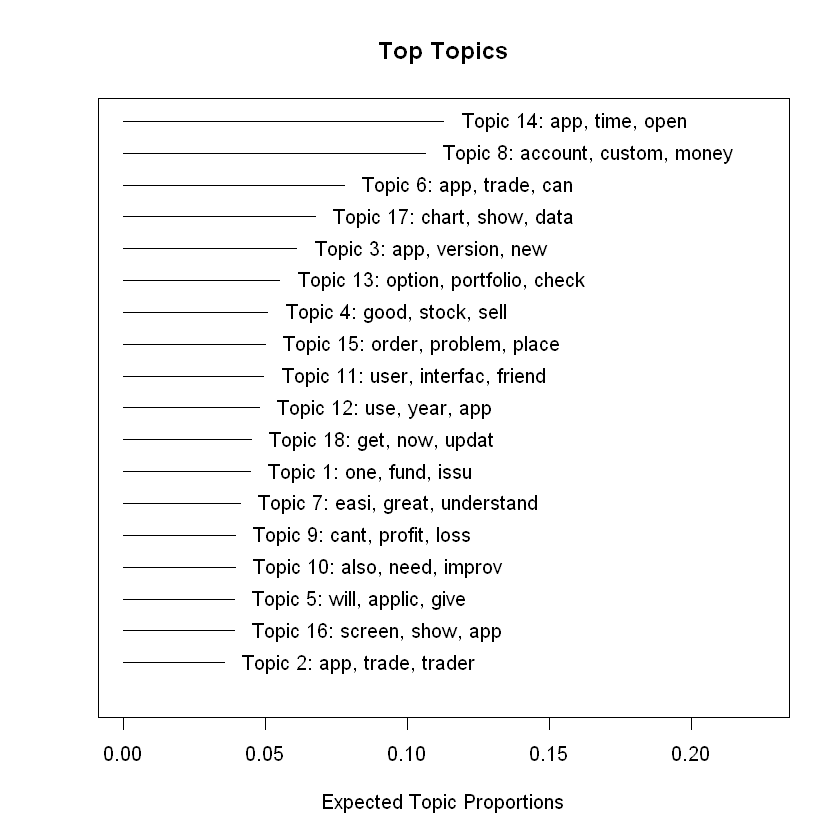

In [7]:
# Set seed for reproducibility
set.seed(832)

# Fit the STM model
system.time({
  Second_STM <- stm(
    documents = out$documents,
    vocab = out$vocab,
    K = 18,  # Number of topics
    prevalence =~ `Trading app` + Sentiment,  # Adjust if necessary
    max.em.its = 75,
    data = out$meta,
    init.type = "Spectral",
    verbose = FALSE
  )
})

# Plot the second topic model
plot(Second_STM)
cat("\n")

labels <- labelTopics(Second_STM)
print(labels)
cat("\n")

   user  system elapsed 
 112.47    1.97  161.56 

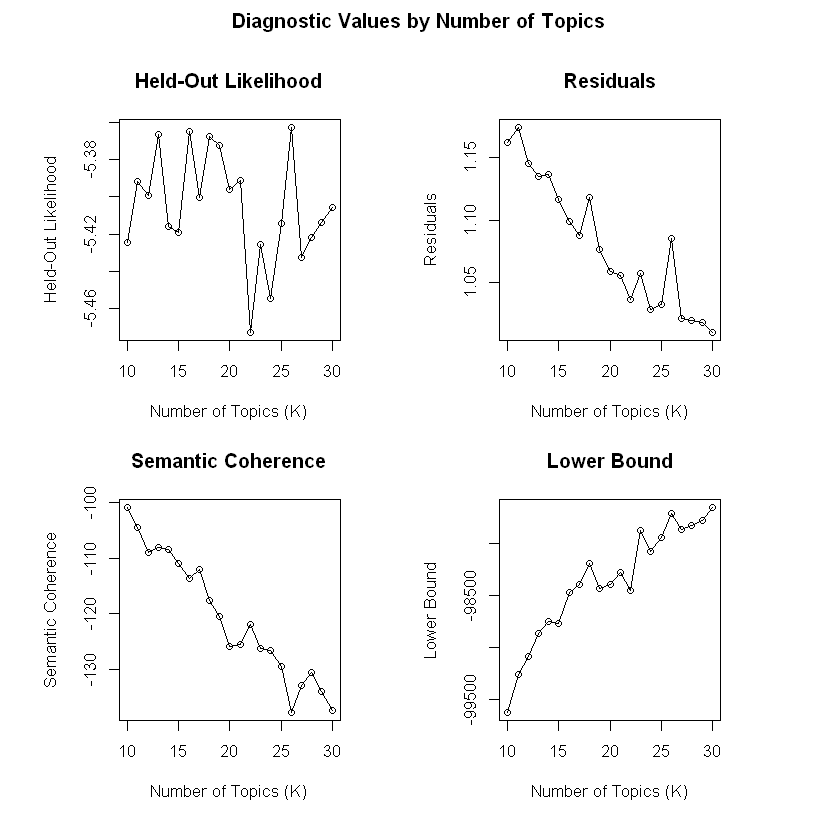

In [8]:
# Set seed for reproducibility
set.seed(833)

# Perform the search for optimal number of topics from 10 to 30
system.time({
  findingk <- searchK(
    out$documents,
    out$vocab,
    K = 10:30,
    prevalence =~ `Trading app` + Sentiment,  # Adjust based on your metadata
    data = out$meta,
    verbose = FALSE
  )
})

# Plot the results
# Held-out likelihood plot
plot(findingk, type = "heldout", main = "Held-out Likelihood vs Number of Topics")

# Residuals plot
plot(findingk, type = "residuals", main = "Residuals vs Number of Topics")

# Semantic coherence plot
plot(findingk, type = "semcoh", main = "Semantic Coherence vs Number of Topics")

# Lower bound plot
plot(findingk, type = "bound", main = "Lower Bound vs Number of Topics")


Beginning Spectral Initialization 
	 Calculating the gram matrix...
	 Finding anchor words...
 	..........
	 Recovering initialization...
 	....
Initialization complete.
....................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 1 (approx. per word bound = -5.634) 
....................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 2 (approx. per word bound = -5.487, relative change = 2.606e-02) 
....................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 3 (approx. per word bound = -5.403, relative change = 1.518e-02) 
....................................................................................................
Completed E-Step (0 seconds). 
Completed M-S

   user  system elapsed 
 159.31    2.18  248.50 

png 
  2

png 
  2

png 
  2

png 
  2

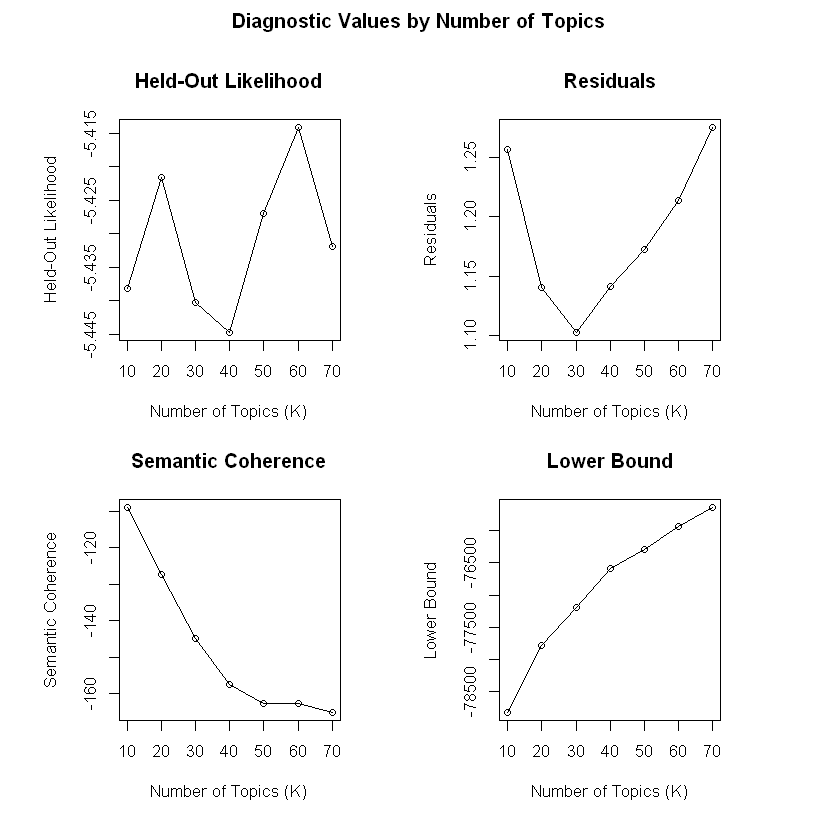

In [15]:
# Set seed for reproducibility
set.seed(834)

# Perform the search for optimal number of topics using the specified K values
system.time({
    findingk_ver2 <- searchK(
        documents = out$documents, 
        vocab = out$vocab,
        K = c(10, 20, 30, 40, 50, 60, 70),  # Specify K values to try
        N = 500,  # Number of documents for held-out likelihood calculation
        proportion = 0.5,  # Proportion of documents used for training vs testing
        heldout.seed = 1234,  # Seed for reproducibility of held-out data
        M = 10,  # Number of times to sample the data for stability
        cores = 1,  # Use 1 core; increase if you want parallelization
        prevalence =~ `Trading app` + `Source` + `Sentiment`,  # Update prevalence formula
        max.em.its = 75,  # Maximum EM iterations
        data = out$meta,  # Metadata associated with the documents
        init.type = "Spectral",  # Initialization method
        verbose = TRUE  # Display progress
    )
})

# Plotting the results
# Overall plot for searchK
plot(findingk_ver2)

# Individual diagnostic plots
# Held-out likelihood plot
png("heldout_likelihood_ver2.png")
plot(findingk_ver2, type = "heldout", main = "Held-out Likelihood vs Number of Topics")
dev.off()

# Residuals plot
png("residuals_ver2.png")
plot(findingk_ver2, type = "residuals", main = "Residuals vs Number of Topics")
dev.off()

# Semantic coherence plot
png("semantic_coherence_ver2.png")
plot(findingk_ver2, type = "semcoh", main = "Semantic Coherence vs Number of Topics")
dev.off()

# Lower bound plot
png("lower_bound_ver2.png")
plot(findingk_ver2, type = "bound", main = "Lower Bound vs Number of Topics")
dev.off()


Beginning Spectral Initialization 
	 Calculating the gram matrix...
	 Finding anchor words...
 		 Initializing tSNE with PCA...
 		 Using tSNE to project to a low-dimensional space...
 		 Calculating exact convex hull...
 	
	 Recovering initialization...
 	....
Initialization complete.
....................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 1 (approx. per word bound = -5.497) 
....................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 2 (approx. per word bound = -5.345, relative change = 2.755e-02) 
....................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 3 (approx. per word bound = -5.284, relative change = 1.146e-02) 
............................

   user  system elapsed 
  23.58    0.25   34.31 

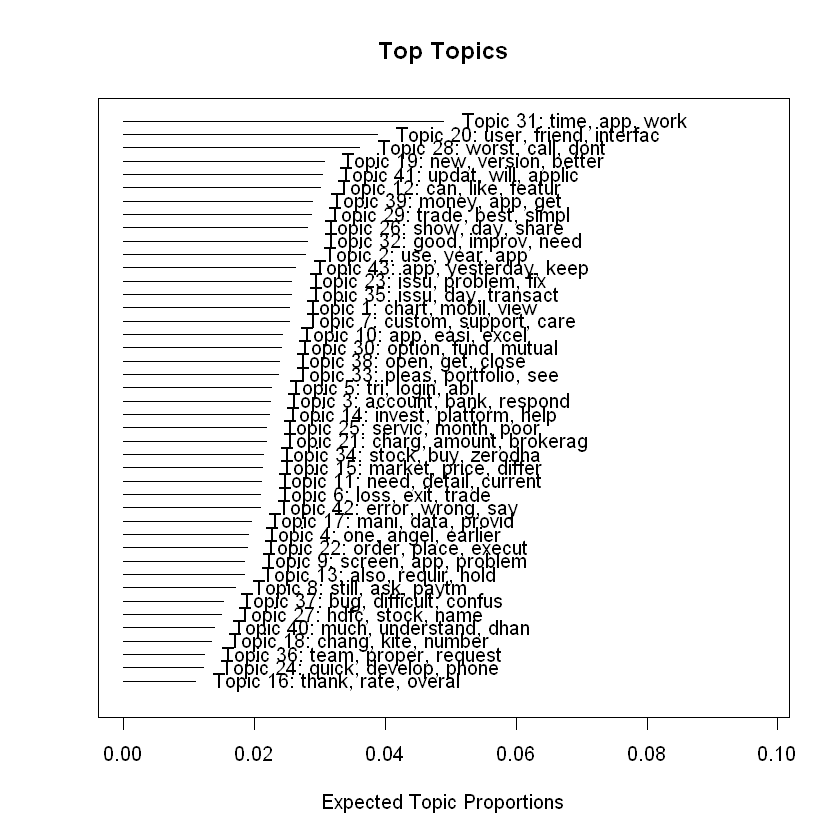

In [16]:
# Set seed for reproducibility
set.seed(835)

# Perform STM with Lee-Mimno method (K=0)
system.time({
    findingk_ver3_lee_mimno <- stm(
        documents = out$documents, 
        vocab = out$vocab,
        K = 0,  # K=0 instructs STM to run Lee-Mimno nonparametric topic modeling
        seed = 1234,  # Randomness now, seed matters for reproducibility
        prevalence =~ `Trading app` + `Sentiment`,  # Update prevalence formula based on your schema
        max.em.its = 75,  # Maximum EM iterations
        data = out$meta,  # Metadata associated with the documents
        init.type = "Spectral",  # Initialization method
        verbose = TRUE  # Display progress
    )
})

# Plotting the results of Lee-Mimno STM
plot(findingk_ver3_lee_mimno)
